In [3]:
import cv2
from matplotlib import pyplot as plt

In [17]:
#Greyscaling image and displaying it
current_image = cv2.imread('HawkesBay.jpeg',0)
cv2.imshow('Greyscale Image', current_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print('Done showing image')

Done showing image
[[151 143 145 ... 169 172 174]
 [151 140 142 ... 148 145 150]
 [147 136 138 ... 134 128 137]
 ...
 [141 132 133 ... 144 145 146]
 [140 132 133 ... 144 145 145]
 [138 131 132 ... 147 148 148]]


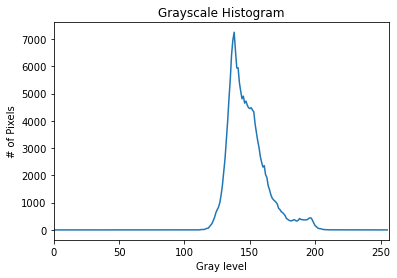

In [105]:
# Calculating histogram from image array
rk = []
for i in range(256):
    rk.append(i)
pixels_count_per_intensity = []
sum = 0
for x in rk:
    for i in range(len(current_image)):
        for j in range(len(current_image[i])):
            if current_image[i][j] == x:
                sum += 1
    pixels_count_per_intensity.append(sum)
    sum = 0

# Using built-in histogram calculation function and displaying histogram
hist = cv2.calcHist([current_image], [0], None, [256], [0,256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Gray level")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


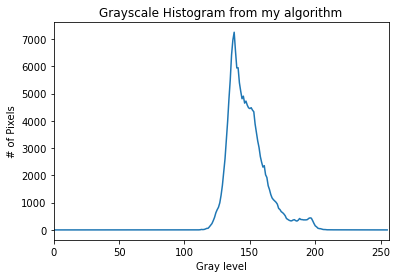

In [108]:
# Displaying histogram from algorithm
plt.figure()
plt.title("Grayscale Histogram from my algorithm")
plt.xlabel("Gray level")
plt.ylabel("# of Pixels")
plt.plot(rk, pixels_count_per_intensity)
plt.xlim([0, 256])
plt.show()

In [113]:
# Histogram equalization calculation
def get_length(a):
    return int(a[0])
np = map(get_length,hist)

np = list(np)
s = []
sum_of_prob_r = 0
sum_of_all_pixels = sum(np)

max_intensity = len(np) - 1
for i in range(len(np)):
    prob_of_r = np[i]/sum_of_all_pixels
    sum_of_prob_r += prob_of_r
    s.append(max_intensity * sum_of_prob_r)
    
rounded_s = [int(round(num)) for num in s]

TypeError: 'int' object is not callable

In [114]:
# Function to associate the rounded sk values to the number of pixels
def get_number_of_pixels_per_intensity(intensities_ptr, new_np):
    sum = 0
    intensities_ptr.append(rounded_s[0])
    for i in range(len(rounded_s)):
        if i == len(rounded_s) - 1:
            new_np.append(sum)
            break
        if rounded_s[i] in intensities_ptr:            
            sum += np[i]
        else:
            intensities_ptr.append(rounded_s[i])
            new_np.append(sum)
            sum = np[i]

In [115]:
# Populating the arrays that will be used to plot histogram
intensities_ptr = []
new_np = []
get_number_of_pixels_per_intensity(intensities_ptr, new_np)

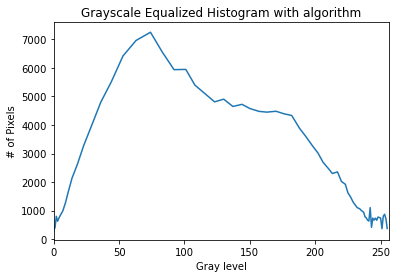

In [116]:
# Displaying equalized histogram from algorithm
plt.figure()
plt.title("Grayscale Equalized Histogram with algorithm")
plt.xlabel("Gray level")
plt.ylabel("# of Pixels")
plt.plot(intensities_ptr, new_np)
plt.xlim([0, 256])
plt.show()

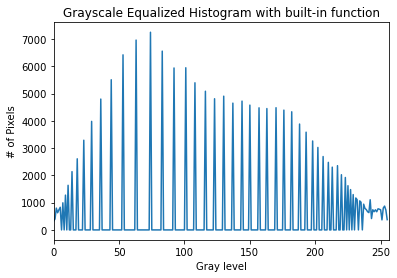

In [117]:
# Displaying equalized histogram using built-in function
equilized_image = cv2.equalizeHist(current_image)
hist2 = cv2.calcHist([equilized_image], [0], None, [256], [0,256])
plt.figure()
plt.title("Grayscale Equalized Histogram with built-in function")
plt.xlabel("Gray level")
plt.ylabel("# of Pixels")
plt.plot(hist2)
plt.xlim([0, 256])
plt.show()